In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/netflix_titles.csv')


In [5]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
print(df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


type
Movie      6131
TV Show    2676
Name: count, dtype: int64


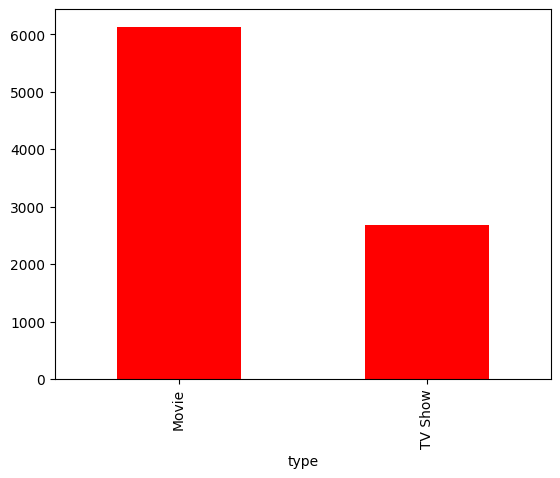

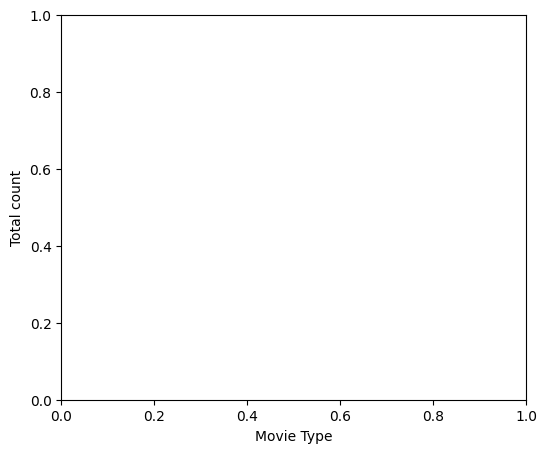

In [9]:

count=df['type'].value_counts()
print(count)
count.plot(kind='bar',color='red')
plt.figure(figsize=(6,5))
plt.xlabel('Movie Type')
plt.ylabel('Total count')
plt.show()


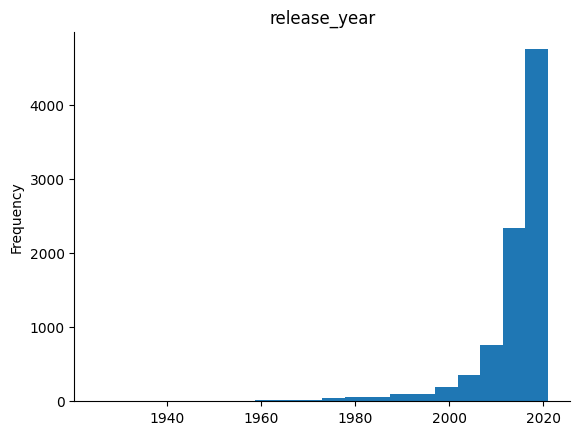

In [16]:
from matplotlib import pyplot as plt
df['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

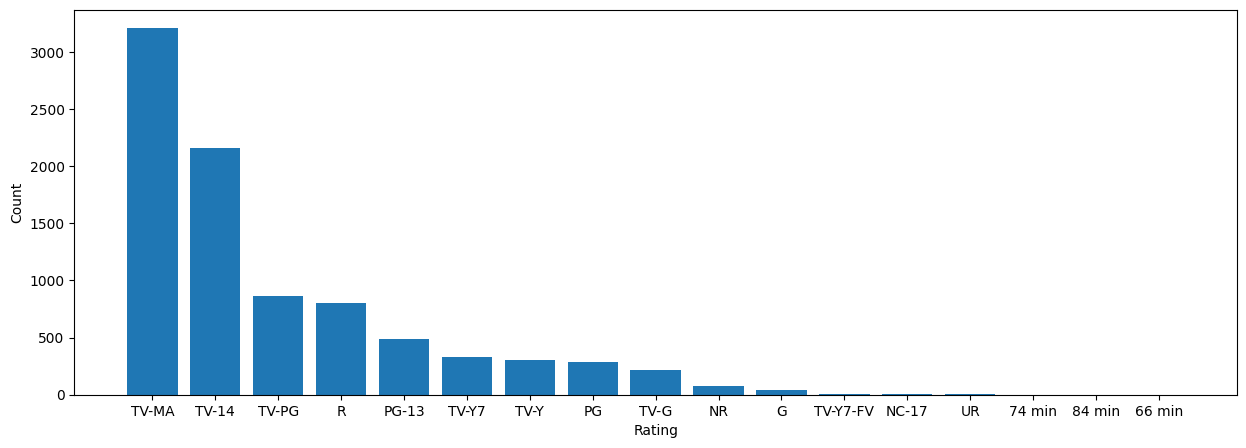

In [10]:
rating_count=df['rating'].value_counts()
rating_count
#visualizing above
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.bar(rating_count.index,rating_count.values)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Movie/TV Shows count')

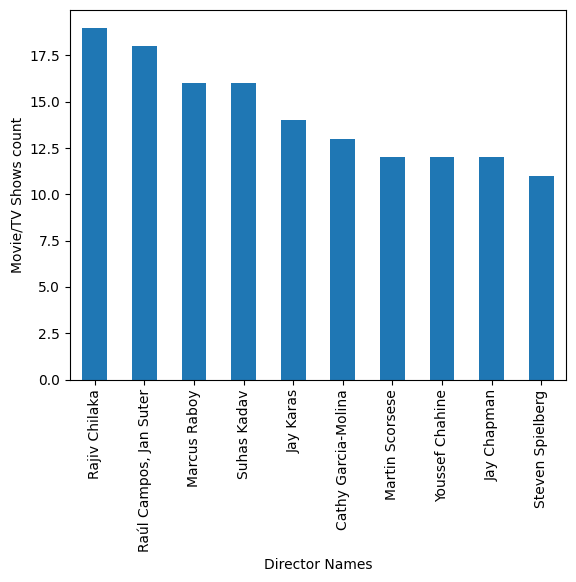

In [11]:
#Top 10 directors by the movie/shows count
director_counts = df['director'].value_counts()
top_directors=director_counts.head(10)
top_directors.plot(kind="bar")
plt.xlabel('Director Names')
plt.ylabel('Movie/TV Shows count')

      type  count
0    Movie   2062
1  TV Show   1145


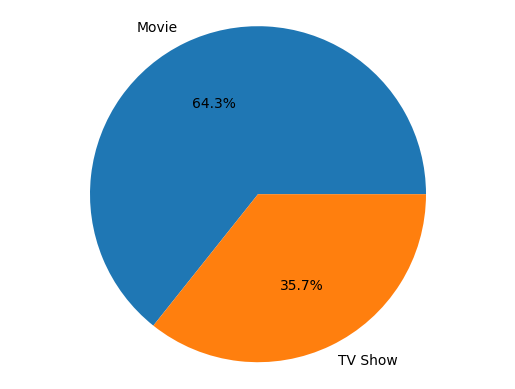

In [12]:
filtered_df = df[df['rating'] == 'TV-MA']


type_counts = filtered_df['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']


print(type_counts)


#pie chart
plt.pie(type_counts['count'], labels=type_counts['type'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

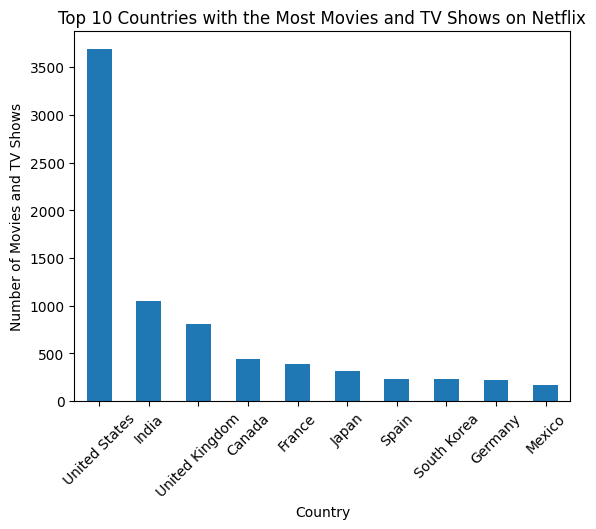

In [13]:
#Top 10 Countries with the Most Movies and TV Shows on Netflix
df['country'] = df['country'].str.split(', ')
data_df = df.explode('country')
country_counts = data_df['country'].value_counts()
top_10_country = country_counts.head(10)
top_10_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Movies and TV Shows')
plt.title('Top 10 Countries with the Most Movies and TV Shows on Netflix')
plt.xticks(rotation=45)
plt.show()

In [14]:
#Listing out all the genres (Which were initially seperated by commas in each Movie/TV Show)
data_df['listed_in'] = data_df['listed_in'].str.split(', ')
data_df = data_df.explode('listed_in')


genre_counts = data_df['listed_in'].value_counts()
print("Genres")
print(genre_counts)

Genres
listed_in
International Movies            3509
Dramas                          3199
Comedies                        1981
International TV Shows          1465
Action & Adventure              1182
Documentaries                   1116
Independent Movies              1040
TV Dramas                        852
Children & Family Movies         845
Thrillers                        806
Romantic Movies                  722
TV Comedies                      630
Kids' TV                         596
Crime TV Shows                   541
Horror Movies                    458
Docuseries                       436
Music & Musicals                 429
Romantic TV Shows                384
Sci-Fi & Fantasy                 380
Stand-Up Comedy                  344
British TV Shows                 306
Reality TV                       270
Sports Movies                    265
TV Action & Adventure            204
Spanish-Language TV Shows        202
Anime Series                     192
Korean TV Shows      